In [85]:
import pandas as pd
import numpy as np

In [86]:
metadata = pd.read_csv("competition_dataset/env_parameter_sample.csv")

metadata = metadata[metadata["sample_name"] != "No_sample"]

In [87]:
print(metadata.describe())
print(metadata.isna().sum())

          TAN_DF      pH_DF     NO2_DF  Alkalinity_DF    TAN_DGS     pH_DGS  \
count  40.000000  40.000000  40.000000      40.000000  40.000000  40.000000   
mean    0.280500   7.291650   0.188875     136.353750   0.150250   7.504000   
std     0.085318   0.277178   0.148646      81.719978   0.062624   0.260751   
min     0.120000   6.889000   0.050000      54.980000   0.040000   7.100000   
25%     0.240000   7.095500   0.090000      82.812500   0.117500   7.320000   
50%     0.280000   7.206000   0.135000      98.715000   0.140000   7.480500   
75%     0.296250   7.476250   0.207500     180.150000   0.170000   7.676000   
max     0.530000   8.070000   0.640000     433.400000   0.395000   8.020000   

         NO2_DGS  Alkalinity_DGS  Flow_rate   Treatment     Module  \
count  40.000000       40.000000  40.000000   40.000000  40.000000   
mean    0.176125      136.693750  60.251583  127.000000   6.500000   
std     0.191367       82.880543   7.047962   58.493918   5.570067   
min     

In [ ]:
import matplotlib.pyplot as plt

for coloumn in metadata.drop(columns="time").columns:
    plt.plot(metadata["time"], metadata[coloumn])
    plt.title(f"{coloumn} vs time")
    plt.show()
    plt.clf()

In [ ]:
for column in metadata.drop(columns="time").columns:
    plt.boxplot(
        metadata[column].dropna()
    )  # dropna() is used to avoid passing NaN values to boxplot
    plt.title(f"{column}")
    plt.show()
    plt.clf()

In [36]:
df = pd.read_csv("competition_dataset/abundance_table.csv", index_col=0)

df = df[df["Taxonomic Rank"] == "S"]
df = df.T

df = df.replace("S", 0)
df = df.replace(np.NaN, 0)

df.columns = df.columns.str.strip()

df.to_csv("test.csv", sep=";")
print(df)

# sample name:

Scientific Name  Homo sapiens  Cicer arietinum  Glycine max  Glycine soja  \
Taxonomic Rank           0.00             0.00          0.0          0.00   
A0                       0.00             0.00          0.0          0.00   
A1_1A                    0.05             0.01          0.0          0.00   
A1_1B                    0.05             0.01          0.0          0.00   
A1_1C                    0.05             0.01          0.0          0.00   
...                       ...              ...          ...           ...   
B9_3A                    0.02             0.01          0.0          0.00   
B9_3B                    0.02             0.01          0.0          0.00   
B9_3BR                   0.03             0.01          0.0          0.00   
B9_3C                    0.03             0.01          0.0          0.00   
sum_percent              4.44             1.34          0.0          0.02   

Scientific Name  Medicago truncatula  Pisum sativum  Trifolium pratense  \


/tmp/ipykernel_36715/2962653908.py:11: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_plot["time"] = pd.to_datetime(df_plot["time"])
/tmp/ipykernel_36715/2962653908.py:14: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  start_time = pd.to_datetime("29/08/2022 08:30")


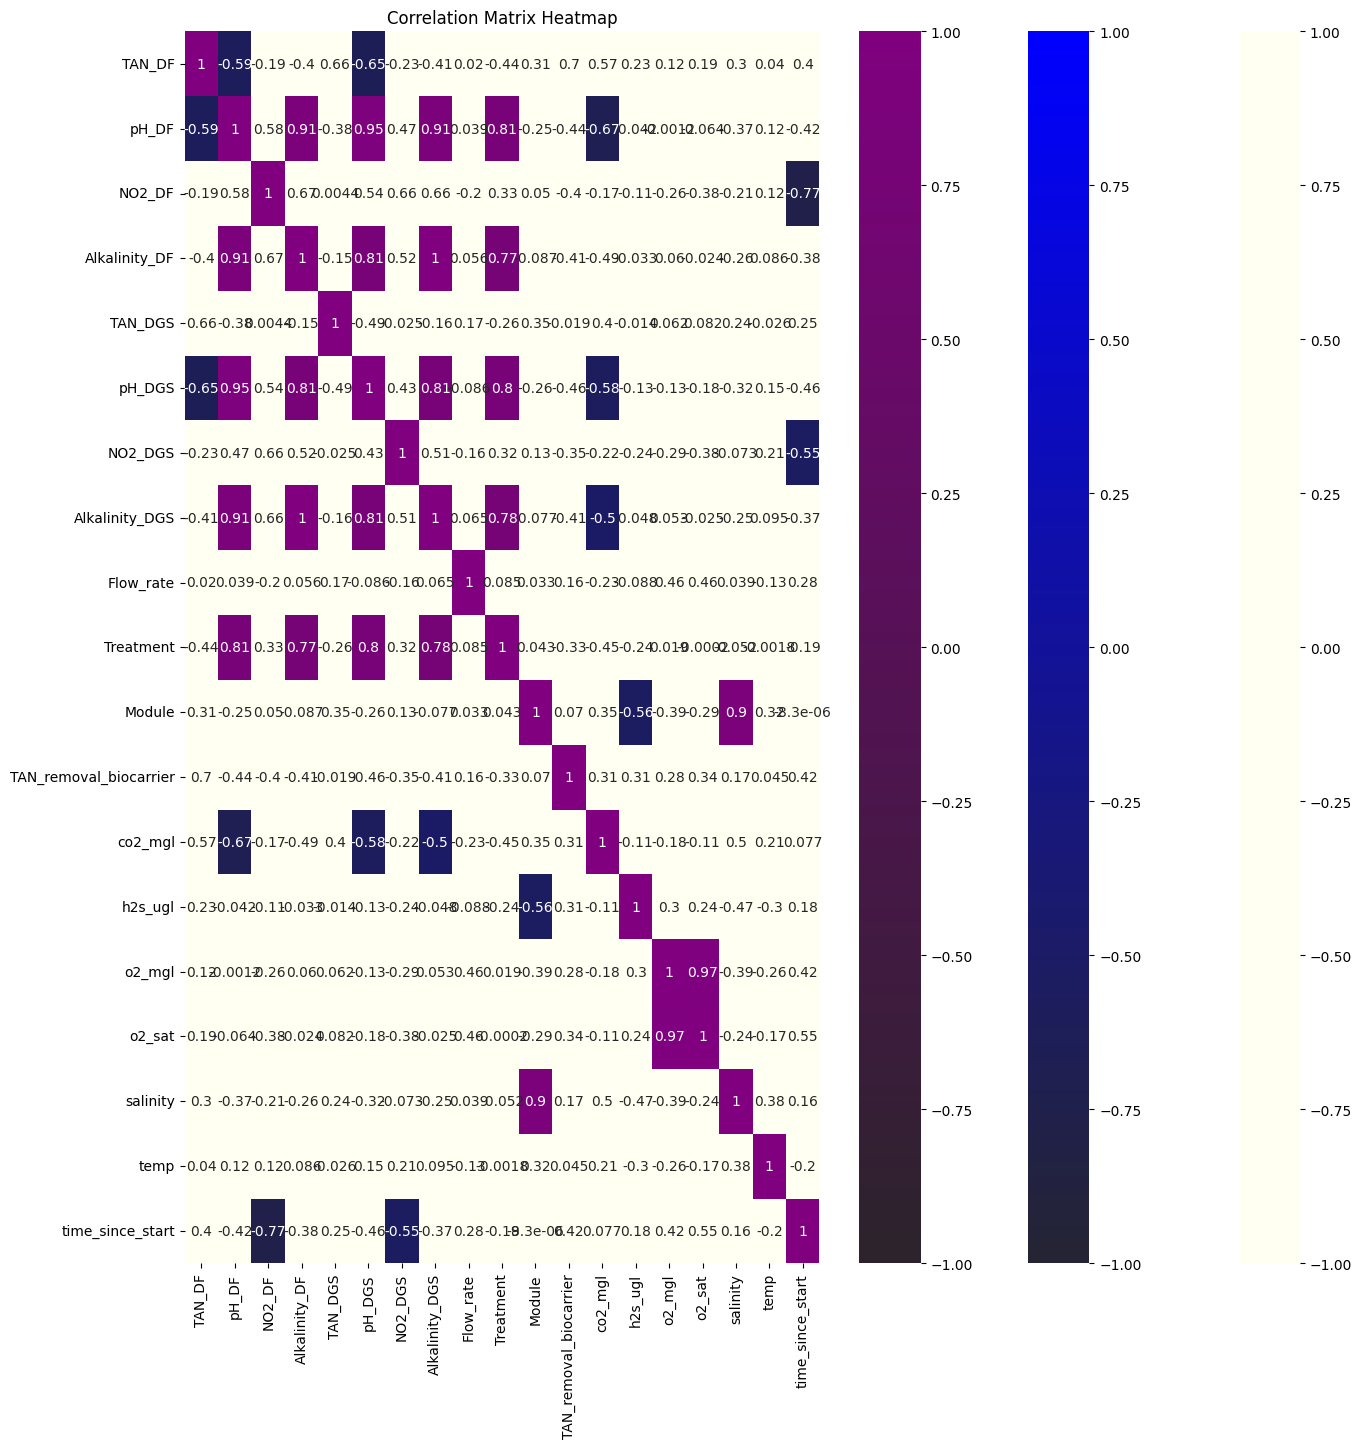

<Figure size 640x480 with 0 Axes>

In [35]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

df_plot = pd.read_csv("competition_dataset/env_parameter_sample.csv")
df_plot = df_plot[df_plot["sample_name"] != "No_sample"]

# Convert the 'time' column to datetime
df_plot["time"] = pd.to_datetime(df_plot["time"])

# Define the start_time
start_time = pd.to_datetime("29/08/2022 08:30")

# Calculate the time difference
df_plot["time_since_start"] = df_plot["time"] - start_time


df_plot = df_plot.drop(columns=["time", "sample_name"])
cov_matrix = df_plot.corr()

# normalizing values between 0 and 1
cov_matrix_normalized = (cov_matrix - cov_matrix.min().min()) / (
    cov_matrix.max().max() - cov_matrix.min().min()
)

plt.figure(figsize=(16, 16))

# Create a mask for correlations more than 0.75 and less than -0.5
mask_075 = cov_matrix > 0.75
mask_075minus = cov_matrix < -0.5

# Set colors - purple for positive correlations > 0.75, blue for negative correlations < -0.5, others in blue-red scale (centered to 0)
cmap = ["#FFFFF2"]
cmap_high = sns.dark_palette("purple", as_cmap=True)
cmap_low = sns.dark_palette("blue", as_cmap=True)

# Plot heatmap for correlations outside the range -0.5 to 0.75
sns.heatmap(
    cov_matrix,
    mask=(mask_075 | mask_075minus),
    cmap=cmap,
    vmin=-1,
    vmax=1,
    center=0,
    annot=True,
)

# Plot heatmap for correlations < -0.5
sns.heatmap(
    cov_matrix,
    mask=np.invert(mask_075minus),
    cmap=cmap_low,
    vmin=-1,
    vmax=1,
    center=0,
    annot=True,
)

# Plot heatmap for correlations > 0.75
sns.heatmap(
    cov_matrix,
    mask=np.invert(mask_075),
    cmap=cmap_high,
    vmin=-1,
    vmax=1,
    center=0,
    annot=True,
)

plt.title(f"Correlation Matrix Heatmap")
plt.savefig(f"covv_matrix_env.png")
plt.show()

plt.clf()